# SpringBoard Capstone2: Coronavirus Tweets Sentiment Analysis

    Data from Kaggle.com: https://www.kaggle.com/datatattle/covid-19-nlp-text-classification/metadata
## Final SVC Model and Metrics

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud
import re
from sklearn.svm import LinearSVC

from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
tweet = pd.read_csv('ProcessedTweets', index_col = 0)
tweet.fillna('', inplace=True)
tweet.head()
tweet.isna().any()

test = pd.read_csv('ProcessedTestData', index_col = 0)
test.fillna('', inplace=True)
test.head()
test.isna().any()

text         False
Sentiment    False
dtype: bool

In [4]:
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 

X = tweet['text'] 
y = tweet['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

Count_vect = CountVectorizer(ngram_range=(1, 1), max_df=0.7, min_df=15)

Count_train = Count_vect.fit_transform(X_train)
Count_test = Count_vect.transform(X_test)

# Print the features
print('# of feature names', len(Count_vect.get_feature_names()))
print(Count_vect.get_feature_names()[100:200])

# of feature names 4507
['alcoholbased', 'aldi', 'alegedly', 'alergies', 'alert', 'alive', 'almost', 'alone', 'along', 'alongside', 'alow', 'alowed', 'alowing', 'alows', 'already', 'also', 'alternative', 'alternatives', 'although', 'always', 'amazing', 'amazon', 'ambulance', 'america', 'american', 'americans', 'amid', 'amidst', 'amo', 'among', 'amongst', 'amount', 'amounts', 'amp', 'ample', 'analysis', 'analyst', 'analysts', 'analytics', 'andor', 'angela', 'angeles', 'angry', 'animal', 'animals', 'another', 'anounce', 'anounced', 'anouncement', 'anouncements', 'anounces', 'anouncing', 'answer', 'answered', 'answers', 'anti', 'antibacterial', 'anticipate', 'anual', 'anxiety', 'anxious', 'anybody', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'ap', 'aparel', 'aparently', 'apart', 'apartment', 'apeal', 'apear', 'apears', 'aple', 'aplications', 'aplied', 'aplies', 'aply', 'apocalypse', 'apr', 'apreciate', 'apreciated', 'apreciation', 'april', 'aproach', 'apropriate', 'aprove', 'a

In [56]:
# #  TfidfVectorizer has a relatively lower accuracy value, cells saved just as a reference


# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split 

# X = tweet['text'] 
# y = tweet['Sentiment']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
# # Initialize a TfidfVectorizer object: tfidf_vectorizer
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), min_df = 15, max_df = 0.7)

# # Transform the training data: tfidf_train 
# tfidf_train = tfidf_vectorizer.fit_transform(X_train)
# # Transform the test data: tfidf_test 
# tfidf_test = tfidf_vectorizer.transform(X_test)

# # Print the first 10 features
# print('# of feature names', len(tfidf_vectorizer.get_feature_names()))
# print(tfidf_vectorizer.get_feature_names()[100:200])
# #print(tfidf_vectorizer.get_feature_names()[-100:])

# # Print the first 5 vectors of the tfidf training data
# print(tfidf_train.A[5])

# of feature names 4507
['alcoholbased', 'aldi', 'alegedly', 'alergies', 'alert', 'alive', 'almost', 'alone', 'along', 'alongside', 'alow', 'alowed', 'alowing', 'alows', 'already', 'also', 'alternative', 'alternatives', 'although', 'always', 'amazing', 'amazon', 'ambulance', 'america', 'american', 'americans', 'amid', 'amidst', 'amo', 'among', 'amongst', 'amount', 'amounts', 'amp', 'ample', 'analysis', 'analyst', 'analysts', 'analytics', 'andor', 'angela', 'angeles', 'angry', 'animal', 'animals', 'another', 'anounce', 'anounced', 'anouncement', 'anouncements', 'anounces', 'anouncing', 'answer', 'answered', 'answers', 'anti', 'antibacterial', 'anticipate', 'anual', 'anxiety', 'anxious', 'anybody', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'ap', 'aparel', 'aparently', 'apart', 'apartment', 'apeal', 'apear', 'apears', 'aple', 'aplications', 'aplied', 'aplies', 'aply', 'apocalypse', 'apr', 'apreciate', 'apreciated', 'apreciation', 'april', 'aproach', 'apropriate', 'aprove', 'a

In [85]:
## use tfidf and tuned parameters (GridSearchCV result for tfidf showed in another file).
##  Linear model showed better results (0.67 Vs. 0.65)
##  But this is also saved as reference

# from sklearn.svm import SVC
# SVCmodel = SVC(C=500, degree=0, gamma=1, kernel='rbf')
# SVCmodel.fit(tfidf_train, y_train)
# y_pred = SVCmodel.predict(tfidf_test)
# print(classification_report(y_test, y_pred))
# print('F1 accuracy: ', metrics.accuracy_score(y_test, y_pred))
# CM = metrics.confusion_matrix(y_test, y_pred, normalize='true')
# print(CM)

                    precision    recall  f1-score   support

Extremely Negative       0.72      0.58      0.64       790
Extremely Positive       0.76      0.62      0.69      1005
          Negative       0.59      0.62      0.61      1516
           Neutral       0.72      0.73      0.72      1176
          Positive       0.59      0.68      0.63      1687

          accuracy                           0.65      6174
         macro avg       0.68      0.65      0.66      6174
      weighted avg       0.66      0.65      0.65      6174

F1 accuracy:  0.6528992549400713
[[0.57974684 0.00506329 0.35316456 0.02025316 0.04177215]
 [0.0039801  0.6238806  0.02587065 0.01691542 0.32935323]
 [0.0883905  0.01649077 0.62401055 0.10290237 0.1682058 ]
 [0.00935374 0.0085034  0.1164966  0.72534014 0.14030612]
 [0.01600474 0.09365738 0.12270302 0.0877297  0.67990516]]


In [78]:
# hyper prameter tuning for SVC (2):  ## some tuning has been done using tfidf, results showed in a seperate file
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [1, 100], 'gamma': [10, 1, 0.1], 'kernel' : ['rbf','poly','sigmoid','linear'],'degree': [0]}
grid = GridSearchCV(SVC(),param_grid,scoring='accuracy', verbose=10)
grid.fit(Count_train,y_train)
 

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START C=1, degree=0, gamma=10, kernel=rbf........................
[CV 1/5; 1/24] END ......C=1, degree=0, gamma=10, kernel=rbf; total time=14.1min
[CV 2/5; 1/24] START C=1, degree=0, gamma=10, kernel=rbf........................
[CV 2/5; 1/24] END ......C=1, degree=0, gamma=10, kernel=rbf; total time=14.1min
[CV 3/5; 1/24] START C=1, degree=0, gamma=10, kernel=rbf........................
[CV 3/5; 1/24] END ......C=1, degree=0, gamma=10, kernel=rbf; total time=13.6min
[CV 4/5; 1/24] START C=1, degree=0, gamma=10, kernel=rbf........................
[CV 4/5; 1/24] END ......C=1, degree=0, gamma=10, kernel=rbf; total time=13.9min
[CV 5/5; 1/24] START C=1, degree=0, gamma=10, kernel=rbf........................
[CV 5/5; 1/24] END ......C=1, degree=0, gamma=10, kernel=rbf; total time=11.9min
[CV 1/5; 2/24] START C=1, degree=0, gamma=10, kernel=poly.......................
[CV 1/5; 2/24] END .....C=1, degree=0, gamma=10

[CV 1/5; 11/24] END C=1, degree=0, gamma=0.1, kernel=sigmoid; total time= 2.3min
[CV 2/5; 11/24] START C=1, degree=0, gamma=0.1, kernel=sigmoid..................
[CV 2/5; 11/24] END C=1, degree=0, gamma=0.1, kernel=sigmoid; total time= 2.5min
[CV 3/5; 11/24] START C=1, degree=0, gamma=0.1, kernel=sigmoid..................
[CV 3/5; 11/24] END C=1, degree=0, gamma=0.1, kernel=sigmoid; total time= 2.3min
[CV 4/5; 11/24] START C=1, degree=0, gamma=0.1, kernel=sigmoid..................
[CV 4/5; 11/24] END C=1, degree=0, gamma=0.1, kernel=sigmoid; total time= 2.6min
[CV 5/5; 11/24] START C=1, degree=0, gamma=0.1, kernel=sigmoid..................
[CV 5/5; 11/24] END C=1, degree=0, gamma=0.1, kernel=sigmoid; total time= 2.6min
[CV 1/5; 12/24] START C=1, degree=0, gamma=0.1, kernel=linear...................
[CV 1/5; 12/24] END .C=1, degree=0, gamma=0.1, kernel=linear; total time= 5.3min
[CV 2/5; 12/24] START C=1, degree=0, gamma=0.1, kernel=linear...................
[CV 2/5; 12/24] END .C=1, de

[CV 2/5; 21/24] END ..C=100, degree=0, gamma=0.1, kernel=rbf; total time=13.4min
[CV 3/5; 21/24] START C=100, degree=0, gamma=0.1, kernel=rbf....................
[CV 3/5; 21/24] END ..C=100, degree=0, gamma=0.1, kernel=rbf; total time=13.4min
[CV 4/5; 21/24] START C=100, degree=0, gamma=0.1, kernel=rbf....................
[CV 4/5; 21/24] END ..C=100, degree=0, gamma=0.1, kernel=rbf; total time=13.5min
[CV 5/5; 21/24] START C=100, degree=0, gamma=0.1, kernel=rbf....................
[CV 5/5; 21/24] END ..C=100, degree=0, gamma=0.1, kernel=rbf; total time=13.5min
[CV 1/5; 22/24] START C=100, degree=0, gamma=0.1, kernel=poly...................
[CV 1/5; 22/24] END .C=100, degree=0, gamma=0.1, kernel=poly; total time= 3.8min
[CV 2/5; 22/24] START C=100, degree=0, gamma=0.1, kernel=poly...................
[CV 2/5; 22/24] END .C=100, degree=0, gamma=0.1, kernel=poly; total time= 3.9min
[CV 3/5; 22/24] START C=100, degree=0, gamma=0.1, kernel=poly...................
[CV 3/5; 22/24] END .C=100, 

In [79]:
result=pd.DataFrame(grid.cv_results_)
result[['params','param_kernel', 'mean_test_score', 'rank_test_score']]

,params,param_kernel,mean_test_score,rank_test_score
0,"{'C': 1, 'degree': 0, 'gamma': 10, 'kernel': '...",rbf,0.286625,13
1,"{'C': 1, 'degree': 0, 'gamma': 10, 'kernel': '...",poly,0.278278,15
2,"{'C': 1, 'degree': 0, 'gamma': 10, 'kernel': '...",sigmoid,0.259011,22
3,"{'C': 1, 'degree': 0, 'gamma': 10, 'kernel': '...",linear,0.633193,1
4,"{'C': 1, 'degree': 0, 'gamma': 1, 'kernel': 'r...",rbf,0.303805,12
5,"{'C': 1, 'degree': 0, 'gamma': 1, 'kernel': 'p...",poly,0.278278,15
6,"{'C': 1, 'degree': 0, 'gamma': 1, 'kernel': 's...",sigmoid,0.245719,24
7,"{'C': 1, 'degree': 0, 'gamma': 1, 'kernel': 'l...",linear,0.633193,1
8,"{'C': 1, 'degree': 0, 'gamma': 0.1, 'kernel': ...",rbf,0.556528,5
9,"{'C': 1, 'degree': 0, 'gamma': 0.1, 'kernel': ...",poly,0.278278,15


In [5]:
## Use CountVecterizer and tuned parameters
from sklearn.svm import SVC
SVCCount = SVC(C=1, degree=0, gamma=1, kernel='linear')
SVCCount.fit(Count_train, y_train)
y_pred_Count = SVCCount.predict(Count_test)
print(classification_report(y_test, y_pred_Count))
print('F1 accuracy: ', metrics.accuracy_score(y_test, y_pred_Count))
cm = metrics.confusion_matrix(y_test, y_pred_Count)

                    precision    recall  f1-score   support

Extremely Negative       0.66      0.66      0.66       790
Extremely Positive       0.70      0.70      0.70      1005
          Negative       0.61      0.62      0.61      1516
           Neutral       0.75      0.75      0.75      1176
          Positive       0.65      0.63      0.64      1687

          accuracy                           0.67      6174
         macro avg       0.67      0.67      0.67      6174
      weighted avg       0.67      0.67      0.67      6174

F1 accuracy:  0.6676384839650146
[[ 523    6  228   11   22]
 [   3  708   28   14  252]
 [ 207   45  943  131  190]
 [  27   18  142  877  112]
 [  36  233  215  132 1071]]


In [7]:
class_names = ['Extremely Negative', 'Negative', 'Neutral','Positive','Extremely Positive']
cm = metrics.confusion_matrix(y_test, y_pred_Count)

Confusion matrix, without normalization
[[ 523    6  228   11   22]
 [   3  708   28   14  252]
 [ 207   45  943  131  190]
 [  27   18  142  877  112]
 [  36  233  215  132 1071]]
Normalized confusion matrix
[[0.66 0.01 0.29 0.01 0.03]
 [0.   0.7  0.03 0.01 0.25]
 [0.14 0.03 0.62 0.09 0.13]
 [0.02 0.02 0.12 0.75 0.1 ]
 [0.02 0.14 0.13 0.08 0.63]]


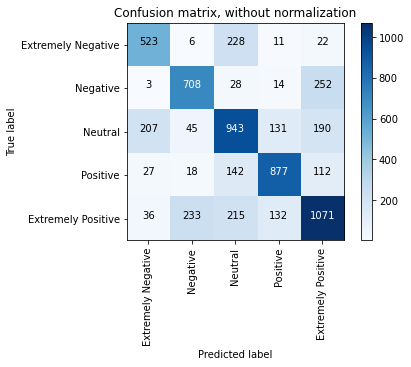

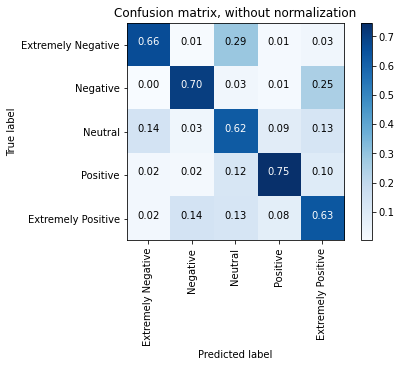

In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

from sklearn import svm, datasets

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title= "Confusion matrix",
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix, without normalization')
    #plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_Count)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=class_names, title = "Confusion matrix, without normalization")
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title = "Normalized confusion matrix")
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 

X_train = tweet['text'] 
y_train = tweet['Sentiment']

X_test = test['text']
y_test = test['Sentiment']

Count_vect = CountVectorizer(ngram_range=(1, 1), max_df=0.7, min_df=15)

Count_train = Count_vect.fit_transform(X_train)
Count_test = Count_vect.transform(X_test)

# Print the features
print('# of feature names', len(Count_vect.get_feature_names()))
print(Count_vect.get_feature_names()[100:200])

# of feature names 4948
['ai', 'aid', 'aim', 'aimed', 'ain', 'aint', 'air', 'airborne', 'airline', 'airlines', 'airport', 'aisle', 'aisles', 'aka', 'alah', 'alberta', 'alcohol', 'alcoholbased', 'aldi', 'alegedly', 'alergies', 'alert', 'aleviate', 'alive', 'almost', 'aloe', 'alone', 'alonetogether', 'along', 'alongside', 'alow', 'alowed', 'alowing', 'alows', 'already', 'also', 'alternative', 'alternatives', 'although', 'always', 'amazing', 'amazon', 'ambulance', 'america', 'american', 'americans', 'americas', 'amid', 'amidst', 'amo', 'among', 'amongst', 'amount', 'amounts', 'amp', 'ample', 'analysis', 'analyst', 'analysts', 'analytics', 'andor', 'andrew', 'angela', 'angeles', 'angry', 'animal', 'animals', 'another', 'anounce', 'anounced', 'anouncement', 'anouncements', 'anounces', 'anouncing', 'anoying', 'answer', 'answered', 'answers', 'anti', 'antibacterial', 'anticipate', 'anual', 'anxiety', 'anxious', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anywhere', 'ap',

In [15]:
## Use CountVecterizer and tuned parameters
from sklearn.svm import SVC
SVCCount = SVC(C=1, degree=0, gamma=1, kernel='linear')
SVCCount.fit(Count_train, y_train)
y_pred_Count = SVCCount.predict(Count_test)

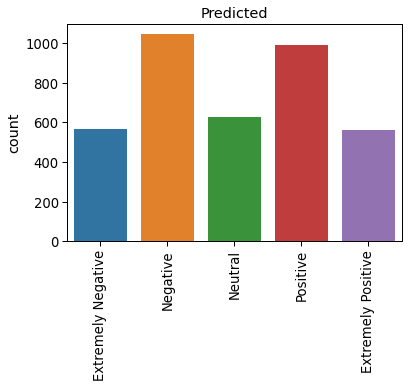

In [16]:
import matplotlib.pyplot as plt

from importlib import reload   ### Had to add these two steps 2021-12-17
plt=reload(plt)                ### Had to add these two steps 2021-12-17

sns.set_context("paper", font_scale=1.5)
order = ['Extremely Negative', 'Negative', 'Neutral','Positive','Extremely Positive']
sns.countplot(x = y_pred_Count, order = order)
plt.xticks(rotation = 90)
plt.title('Predicted')
plt.show()

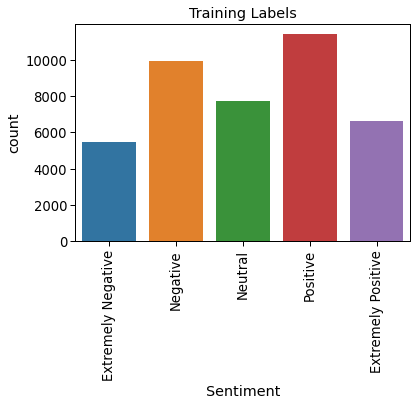

In [17]:
import matplotlib.pyplot as plt

from importlib import reload   ### Had to add these two steps 2021-12-17
plt=reload(plt)                ### Had to add these two steps 2021-12-17

sns.set_context("paper", font_scale=1.5)
order = ['Extremely Negative', 'Negative', 'Neutral','Positive','Extremely Positive']
sns.countplot(x = 'Sentiment', data = tweet, order = order)
plt.xticks(rotation = 90)
plt.title('Training Labels')
plt.show()